# 用于手写数字识别的神经网络，多类分类

在这个练习中，您将使用神经网络来识别手写数字 0-9。

# 大纲
- [1 - 包](#1)
- [2 - ReLU 激活](#2)
- [3 - Softmax 函数](#3)
  - [练习 1](#ex01)
- [4 - 神经网络](#4)
  - [4.1 问题描述](#4.1)
  - [4.2 数据集](#4.2)
  - [4.3 模型表示](#4.3)
  - [4.4 Tensorflow 模型实现](#4.4)
  - [4.5 Softmax 的位置](#4.5)
    - [练习 2](#ex02)

<a name="1"></a>
## 1 - 包

首先，运行下面的单元格以导入在本练习中所需的所有包。
- [numpy](https://numpy.org/) 是用于科学计算的 Python 基本包。
- [matplotlib](http://matplotlib.org) 是 Python 中绘制图形的流行库。
- [tensorflow](https://www.tensorflow.org/) 是一种流行的机器学习平台。

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt

plt.style.use('./deeplearning.mplstyle')

import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax

np.set_printoptions(precision=2)

<a name="2"></a>
## 2 - ReLU 激活

本周，引入了一种新的激活函数，即整流线性单元（ReLU）。
$$ a = max(0,z) \quad\quad\text {# ReLU 函数} $$

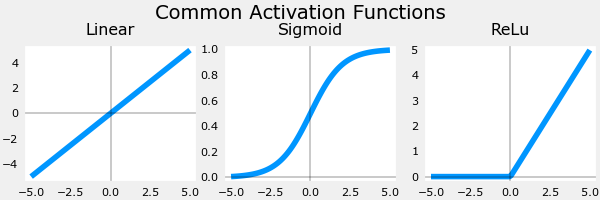

In [2]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
讲座中右侧的示例展示了 ReLU 的应用。在这个示例中，派生的 "awareness" 特征不是二进制的，而是具有连续的值范围。Sigmoid 函数适用于开/关或二进制情况。ReLU 提供了一个连续的线性关系。此外，它还有一个输出为零的 "关闭" 范围。

"关闭" 特性使 ReLU 成为一种非线性激活函数。为什么需要这个特性？这允许多个单元贡献到最终的函数而不会相互干扰。这在支持的可选实验中更详细地探讨。

<a name="3"></a>
## 3 - Softmax Function
多类神经网络生成 N 个输出。其中一个输出被选为预测答案。在输出层，通过线性函数生成了一个向量 $\mathbf{z}$，然后将其输入到 softmax 函数中。Softmax 函数将 $\mathbf{z}$ 转换为概率分布，如下所述。应用 softmax 后，每个输出将位于 0 到 1 之间，且所有输出之和为 1。它们可以被解释为概率。较大的输入将对应较大的输出概率。
<center>  <img  src="./images/C2_W2_NNSoftmax.PNG" width="600" />  

Softmax 函数可以写成：

$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

其中，$z = \mathbf{w} \cdot \mathbf{x} + b$，而 N 是输出层中特征/类别的数量。 

<a name="ex01"></a>
### 练习 1
让我们创建一个 NumPy 实现：

In [3]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    ### START CODE HERE ### 
    ez=np.exp(z)
    a=ez/np.sum(ez)
    ### END CODE HERE ### 
    return a

In [4]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST  
test_my_softmax(my_softmax)
# END UNIT TEST  

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    One implementation uses for loop to first build the denominator and then a second loop to calculate each output.
    
```python
def my_softmax(z):  
    N = len(z)
    a =                     # initialize a to zeros 
    ez_sum =                # initialize sum to zero
    for k in range(N):      # loop over number of outputs             
        ez_sum +=           # sum exp(z[k]) to build the shared denominator      
    for j in range(N):      # loop over number of outputs again                
        a[j] =              # divide each the exp of each output by the denominator   
    return(a)
```
<details>
  <summary><font size="3" color="darkgreen"><b>Click for code</b></font></summary>
   
```python
def my_softmax(z):  
    N = len(z)
    a = np.zeros(N)
    ez_sum = 0
    for k in range(N):                
        ez_sum += np.exp(z[k])       
    for j in range(N):                
        a[j] = np.exp(z[j])/ez_sum   
    return(a)

Or, a vector implementation:

def my_softmax(z):  
    ez = np.exp(z)              
    a = ez/np.sum(ez)           
    return(a)

```


Below, vary the values of the `z` inputs. Note in particular how the exponential in the numerator magnifies small differences in the values. Note as well that the output values sum to one.

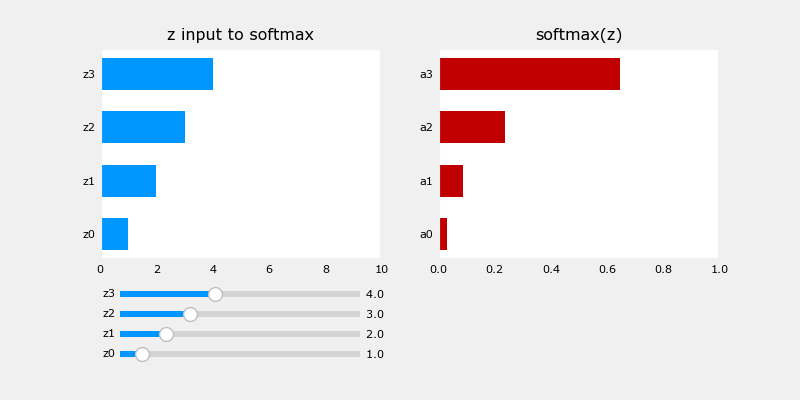

In [5]:
plt.close("all")
plt_softmax(my_softmax)

<a name="4"></a>
## 4 - Neural Networks

In last weeks assignment, you implemented a neural network to do binary classification. This week you will extend that to multiclass classification. This will utilize the softmax activation.


<a name="4.1"></a>
### 4.1 Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 


<a name="4.2"></a>
### 4.2 Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

## 4 - 神经网络

在上周的作业中，您实现了一个用于二元分类的神经网络。本周，您将扩展到多类分类，这将使用 softmax 激活。

### 4.1 问题描述

在本练习中，您将使用神经网络识别手写的十个数字，0-9。这是一个多类分类任务，需要从 n 个选择中选择一个。自动手写数字识别如今被广泛使用，从识别邮件信封上的邮政编码到识别银行支票上写的金额等。

### 4.2 数据集

您将从加载用于此任务的数据集开始。

- 下面所示的 `load_data()` 函数将数据加载到变量 `X` 和 `y` 中。

- 数据集包含 5000 个手写数字的训练示例 $^1$。

    - 每个训练示例都是一个 20 像素 x 20 像素的灰度图像。
        - 每个像素由一个浮点数表示，指示该位置的灰度强度。
        - 20 x 20 像素的网格被“展开”成一个 400 维向量。
        - 每个训练示例变成了数据矩阵 `X` 中的单行。
        - 这给我们一个 5000 x 400 的矩阵 `X`，其中每一行都是一个手写数字图像的训练示例。

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- 训练集的第二部分是一个 5000 x 1 的向量 `y`，其中包含训练集的标签。
    - 如果图像是数字 `0`，则 `y = 0`，如果图像是数字 `4`，则 `y = 4`，依此类推。

$^1$<sub> 这是 MNIST 手写数字数据集的子集 (http://yann.lecun.com/exdb/mnist/)。</sub>

In [17]:
# load dataset
X, y = load_data()
print(f"X.shape={X.shape},y.shape={y.shape}")

X.shape=(5000, 400),y.shape=(5000, 1)


#### 4.2.1 查看变量
让我们更加熟悉数据集。
- 一个好的开始是打印出每个变量并查看其包含的内容。

下面的代码打印了变量 `X` 和 `y` 中的第一个元素。

In [14]:
print('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [16]:
print('The first element of y is: ', y[0, 0])
print('The last element of y is: ', y[-1, 0])

The first element of y is:  0
The last element of y is:  9


#### 4.2.2 检查变量的维度

熟悉数据的另一种方法是查看其维度。请打印出 `X` 和 `y` 的形状，看看数据集中有多少个训练示例。

In [9]:
print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### 4.2.3 可视化数据

首先，你将开始可视化训练集的一个子集。
- 在下面的单元格中，代码从 `X` 中随机选择了 64 行，将每行映射回 20 像素乘 20 像素的灰度图像，并将这些图像显示在一起。
- 每个图像上方显示了其标签。

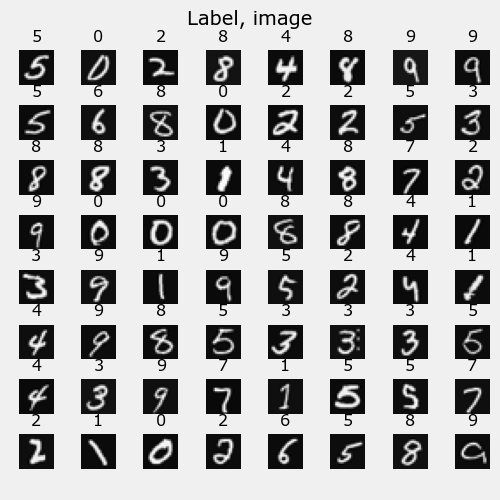

In [18]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 模型表示

你将在此任务中使用的神经网络如下图所示。
- 它有两个具有 ReLU 激活函数的密集层，然后是一个具有线性激活函数的输出层。
    - 请记住，我们的输入是手写数字图像的像素值。
    - 由于图像的大小为 $20\times20$，这给了我们 $400$ 个输入。

<img src="images/C2_W2_Assigment_NN.png" width="1000" height="auto">

- 参数的维度适用于具有 $25$ 个第 1 层单元、$15$ 个第 2 层单元和 $10$ 个第 3 层输出单元的神经网络，每个单元对应一个数字。

    - 请记住，这些参数的维度是如下确定的：
        - 如果网络的第一层有 $s_{in}$ 个单元，下一层有 $s_{out}$ 个单元，那么：
            - $W$ 的维度为 $s_{in} \times s_{out}$。
            - $b$ 是一个包含 $s_{out}$ 个元素的向量。
  
    - 因此，`W` 和 `b` 的形状如下：
        - 第 1 层：`W1` 的形状为 (400, 25)，`b1` 的形状为 (25,)
        - 第 2 层：`W2` 的形状为 (25, 15)，`b2` 的形状为 (15,)
        - 第 3 层：`W3` 的形状为 (15, 10)，`b3` 的形状为 (10,)
>**注意：**偏差向量 `b` 可以表示为 1-D (n,) 或 2-D (n,1) 数组。Tensorflow 使用 1-D 表示法，而此实验室将保持这种约定。          

<a name="4.4"></a>
### 4.4 Tensorflow Model Implementation


在Tensorflow中，模型是一层一层构建的。一层的输入维度（上面的$s_{in}$）是由系统计算的。您需要指定一层的*输出维度*，这将决定下一层的输入维度。第一层的输入维度是根据在下面的`model.fit`语句中指定的输入数据的大小来推导的。
>**注意：**您还可以添加一个输入层，用于指定第一层的输入维度。例如：  
`tf.keras.Input(shape=(400,))    #指定输入形状`  
我们将在这里包括它，以阐明一些模型的大小。

<a name="4.5"></a>
### 4.5 Softmax placement
As described in the lecture and the optional softmax lab, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

### 4.5 软最大值的放置
如讲座和可选的软最大值实验所述，将软最大值与损失函数分组而不是与输出层分组会提高数值稳定性。这在*构建*模型和*使用*模型时有一些影响。  
构建模型时应注意以下几点：  
* 最终的全连接层应使用“线性”激活函数，实际上相当于没有激活函数。
* `model.compile` 语句将通过包含 `from_logits=True` 来指示这一点。  
  `loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`  

这不会影响目标的形式。在使用SparseCategorialCrossentropy的情况下，目标是期望的数字，即0-9。

在使用模型时需要注意：  
* 输出不是概率。如果需要输出概率，应用软最大值函数。

<a name="ex02"></a>
### Exercise 2

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a ReLU activation to construct the three layer network described above.
### 练习 2

在下面，使用Keras [Sequential 模型](https://keras.io/guides/sequential_model/) 和 [Dense 层](https://keras.io/api/layers/core_layers/dense/)，以及 ReLU 激活函数来构建上述描述的三层神经网络。

In [11]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234)  # for consistent results
model = Sequential(
    [
        ### START CODE HERE ### 
        Dense(25,activation='relu',name="L1"),
        Dense(15,activation='relu',name="L2"),
        Dense(10,activation='linear',name="L3"),

        ### END CODE HERE ### 
    ], name="my_model"
)


In [19]:
# model(X)
# model.summary()

<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to expand)</b></font></summary>
The `model.summary()` function displays a useful summary of the model. Note, the names of the layers may vary as they are auto-generated unless the name is specified.    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 25)                10025     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 10)                160       
=================================================================
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________
```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
tf.random.set_seed(1234)
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),     # @REPLACE 
        Dense(25, activation='relu', name = "L1"), # @REPLACE 
        Dense(15, activation='relu',  name = "L2"), # @REPLACE  
        Dense(10, activation='linear', name = "L3"),  # @REPLACE 
        ### END CODE HERE ### 
    ], name = "my_model" 
)
``` 

In [21]:
# BEGIN UNIT TEST     
test_model(model, 10, 400)
# END UNIT TEST     

All tests passed!


In [22]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [23]:
[layer1, layer2, layer3] = model.layers

In [24]:
#### Examine Weights shapes
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (10,)
```

以下代码：
- 定义了一个损失函数，`SparseCategoricalCrossentropy`，并通过添加 `from_logits=True` 表示 softmax 应该包含在损失计算中。
- 定义了一个优化器。一个常用的选择是自适应矩（Adam），在课程中有介绍。

In [25]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X, y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.4652
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5968
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4164
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3404
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2975
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2419
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2222
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2157
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1836
Epoch 12/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1775
Epoch 13/40
157/157 [====

#### Epochs 和批次
在上面的`compile`语句中，`epochs`的数量被设置为100。这表示整个数据集应该在训练中被应用100次。在训练过程中，您会看到描述训练进度的输出，类似于以下内容：
```
Epoch 1/100
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
第一行，`Epoch 1/100`，描述了模型当前正在运行的是第几个周期。为了提高效率，训练数据集被分成了"批次"。在Tensorflow中，默认批次的大小是32。我们的数据集中有5000个示例，大约有157个批次。第二行的标记`157/157 [====`描述了已经执行了哪个批次。

#### 损失（成本）
在课程1中，我们学会了通过监控成本来跟踪梯度下降的进展。理想情况下，随着算法迭代次数的增加，成本会减少。Tensorflow将成本称为`loss`。在上面，您在执行`model.fit`时每个周期都看到了损失的显示。[.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model)方法返回各种指标，包括损失。这在上面的`history`变量中有记录。这可以用来查看损失，如下所示的图表。

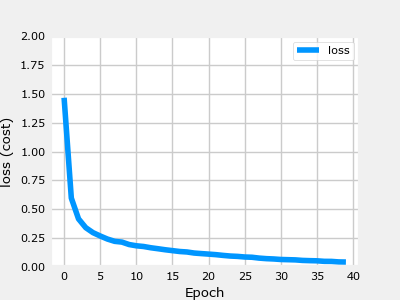

In [26]:
plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

In [ ]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1, 400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [ ]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [ ]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  #[left, bottom, right, top]
widgvis(fig)
for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1, 400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index, 0]},{yhat}", fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Let's look at some of the errors. 
>Note: increasing the number of training epochs can eliminate the errors on this data set.

In [ ]:
print(f"{display_errors(model, X, y)} errors out of {len(X)} images")

### Congratulations!
You have successfully built and utilized a neural network to do multiclass classification.